<a href="https://colab.research.google.com/github/simon2016bht/PlotWisely/blob/main/DumbbellChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:

- Radovan Kavicky/2022-07-01 Making Economist Style Plots in Matplotlib

- Economist

- Storytelling with Data: A Data Visualization Guide for Business Professionals 1st Edition
by Cole Nussbaumer Knaflic

- Matplotlib API Reference

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100
gdp = pd.read_csv('gdp_1960_2020.csv') #https://www.kaggle.com/holoong9291/gdp-of-all-countries19602020/version/3
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000
#gdp.head()
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()

<ipython-input-1-332ea7da31e7>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[gdp['state'] == 'Asia'].tail()


,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9977,2020,19,Saudi Arabia,Asia,700117873249,0.009029,0.700118
9973,2020,15,Indonesia,Asia,1058423838345,0.013650,1.058424
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731


## Dumbbell chart


In [3]:
countries = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]['country'].values
gdp_dumbbell = gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 1960) | (gdp['year'] == 2020))].sort_values(by='gdp')
gdp_dumbbell.head(5)


,year,rank,country,state,gdp,gdp_percent,gdp_trillions
31,1960,32,South Korea,Asia,3958190758,0.003413,0.003958
7,1960,8,India,Asia,37029883875,0.031931,0.037030
6,1960,7,Italy,Europe,40385288344,0.034824,0.040385
5,1960,6,Canada,America,40461721692,0.034890,0.040462
3,1960,4,China,Asia,59716467625,0.051493,0.059716


<ipython-input-4-f2f1df896881>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again


Text(-0.08, 0.04, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

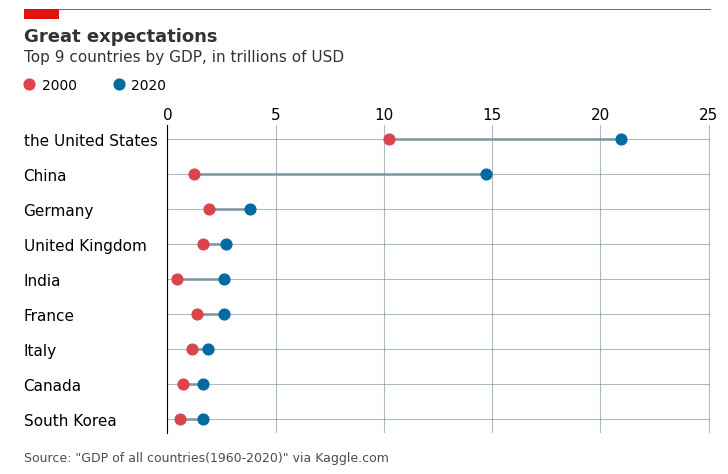

In [4]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(7,4))

# Create grid
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Setup data
gdp_dumbbell = (gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 2000) | (gdp['year'] == 2020))][['year','gdp_trillions','country']]
                .pivot(index='country',columns='year', values='gdp_trillions')
                .sort_values(by=2020))

# Plot data
# Plot horizontal lines first
ax.hlines(y=gdp_dumbbell.index, xmin=gdp_dumbbell[2000], xmax=gdp_dumbbell[2020], color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)
# Plot bubbles next
ax.scatter(gdp_dumbbell[2000], gdp_dumbbell.index, label='2000', s=60, color='#DB444B', zorder=3)
ax.scatter(gdp_dumbbell[2020], gdp_dumbbell.index, label='2020', s=60, color='#006BA2', zorder=3)

# Set xlim
ax.set_xlim(0, 25.05)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['2000', '2020'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.08, .9],                 # Set width of line
        [1.17, 1.17],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False,
        color='#E3120B',
        linewidth=.6)
ax.add_patch(plt.Rectangle((-0.08,1.17),               # Set location of rectangle by lower left corder
                           0.05,                       # Width of rectangle
                           -0.025,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B',
                           transform=fig.transFigure,
                           clip_on=False,
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-0.08, y=1.09, s="Great expectations", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.08, y=1.04, s="Top 9 countries by GDP, in trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.08, y=0.04, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

#